# <span style="color:blue"> Esercizio 7
 
Nell'esercizio 4 abbiamo studiato l'andamento delle grandezze termodinamiche nel caso dell'insieme microcanonico, ovvero ad energia fissata, mentre in questo caso si analizzano le medesime grandezze e in aggiunta la funzione di distribuzione radiale nell'inseme canonico, cioè inserendo il sistema all'interno di un bagno termico.
Perciò il sistema può essere pensato a contatto con un corpo di volume molto maggiore che assicura una temperatura costante.
    
I valori caratterizzanti le tre fasi utilizzate per tutta la simulazione sono: 
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)
    
    
Il codice della simulazione NVT è basato sull'algoritmo di Metropolis. Ad ogni passo, per un numero di volte pari al numero di particelle, ne viene estratta casualemente una e viene proposta una mossa, la quale consiste nella traslazione delle sue coordinate spaziali di una quantità estratta casualmente fra $[-\delta, \delta]$. La scelta della dimensione del passo $\delta$ è stata fatta al fine di ottenere un valore di accettanza in un intorno del $50\%$. 
Una volta proposta la mossa, viene calcolato il valore d'energia e la relativa probabilità di accettazione secondo i pesi di boltzmann $p(x)=\min[1, e^{-\beta(E_{new}-E_{old})}]$. Dopo aver accettato o rifiutato la mossa, vengono stimate le grandezze termodinamiche, il tutto per un numero di passi pari a $L=500$ per $N=40$ blocchi; le scelte di dimensionamento verrano giustificate in seguito.
 
    
### 7.01 
La prima parte consiste nell'equilibrare il sistema. Per fare ciò si è utilizzato una conferma grafica del raggiungimento della situazione di equilibrio, graficando l'andamento della curva $U/N$ e $P$, in unità di LJ, per un numero di passi pari a $M=300$.
Come si può notare dai grafici sottostanti, il sistema può considerarsi equilibrato per tutte e tre le fasi con un numero di passi pari a circa 150. 

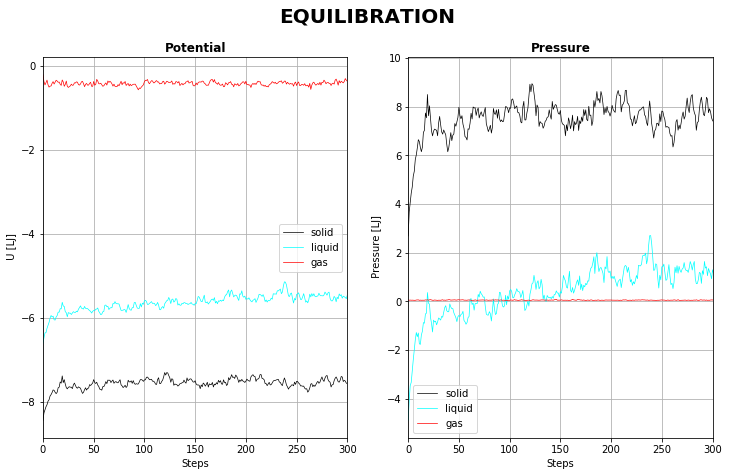

In [1]:
## import matplotlib
import matplotlib.pyplot as plt
import numpy as np


##Equilibration Potential

fig=plt.figure(figsize=(12,7))
fig.suptitle('EQUILIBRATION', fontsize=20, fontweight="bold")

plt.subplot(121)
v=np.loadtxt("ex_7/Instval.solid.out", usecols=(0), unpack=True)
x= range(v.size)
plt.plot(x, v, color= "black", linewidth=0.7, label='solid')
v=np.loadtxt("ex_7/Instval.liquid.out", usecols=(0), unpack=True)
x= range(v.size)
plt.plot(x, v, color= "cyan", linewidth=0.7, label='liquid')
v=np.loadtxt("ex_7/Instval.gas.out", usecols=(0), unpack=True)
x= range(v.size)
plt.plot(x, v, color= "red", linewidth=0.7, label='gas')


plt.title("Potential", fontweight="bold")
plt.xlabel('Steps')
plt.ylabel(' U [LJ]')
plt.legend()

plt.xlim(0.0, 300.0)
plt.grid(True)

##Equilibration Pressure

plt.subplot(122)

v=np.loadtxt("ex_7/Instval.solid.out", usecols=(1), unpack=True)
x= range(v.size)
plt.plot(x, v, color= "black", linewidth=0.7, label='solid')
v=np.loadtxt("ex_7/Instval.liquid.out", usecols=(1), unpack=True)
x= range(v.size)
plt.plot(x, v, color= "cyan", linewidth=0.7, label='liquid')
v=np.loadtxt("ex_7/Instval.gas.out", usecols=(1), unpack=True)
x= range(v.size)
plt.plot(x, v, color= "red", linewidth=0.7, label='gas')


plt.title("Pressure", fontweight="bold")
plt.xlabel('Steps')
plt.ylabel(' Pressure [LJ]')
plt.legend()

plt.xlim(0.0, 300.0)
plt.grid(True)

### 7.02


### Autocorrelazione
Una volta equilibrato il sistema sono stati stampati $M=5\times10^5$ valori al fine di stimare il tempo di correlazione $t_c$ e valutare correttamente la dimensione ottimale dei blocchi per il calcolo dell'incertezza.
Il fine è quindi valutare dopo quanto tempo (e quindi dopo quanti passi dell'algoritmo) i valori ottenuti possono essere considerati scorrelati. 
Per fare ciò è stato stimato l'andamento della funzione di autocorrelazione $$ \chi(t)=\frac{<g(t')g(t+t')>_{t'}-<m>^2}{\sigma^2} $$
per il campione dei valori di $U/N$ e $P$.
La funzione così definita è stata adattata per il calcolo nel caso di tempi discreti. E' stata utilizzata la funzione *np.corecoeff* la quale restituisce la matrice di correlazione fra due vettori di misure, implementata all'interno di un ciclo per effettuare il calcolo su tutte le distanze temporali discrete (la scelta dell'utilizzo di *np.corecoeff* e del calcolo con solo $2\times10^5$ valori sono dovute al tempo computazionale eccessivo).

Il risultato è stato poi graficato in modo da avere una rappresentazione dell'andamento della funzione rispetto al numero di passi e ottenere una stima del valore $t_c$, confrontando la $\chi(t)$ graficata con $e^{-\frac{t}{t_c}}$. Le misure possono considerarsi veramente scorrelate dopo $t=2t_c$, perciò il blocco andrà dimensionato di conseguenza, con una dimensione minima pari a $2t_c$.


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


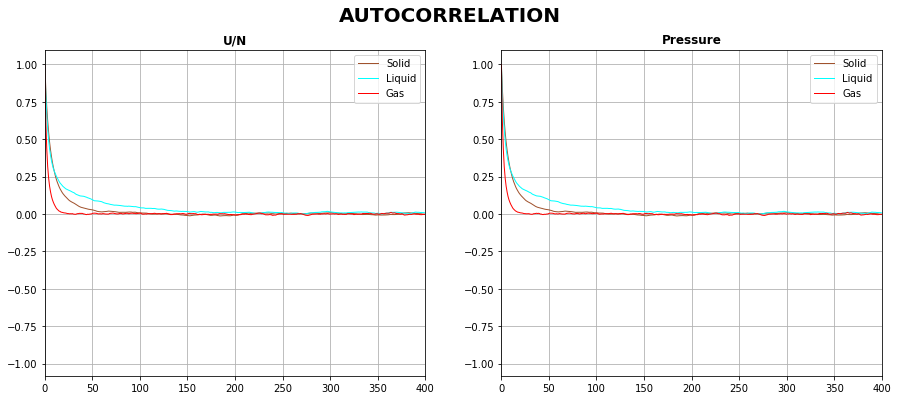

In [13]:
## import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15,6))
fig.suptitle('AUTOCORRELATION', fontsize=20, fontweight="bold")


plt.subplot(121)
v,w=np.loadtxt("ex_7/instval_equilibrated.solid.out", usecols=(0, 1), unpack=True, max_rows=200000)
chi = []
for i in range(v.size-2):
    a=v[i:v.size]
    z=v[:v.size-i]
    chi.append(np.corrcoef(a,z)[0,1])
x= range(len(chi))
plt.plot(x, chi, color= "sienna", linewidth=1, label='Solid')
v,w=np.loadtxt("ex_7/instval_equilibrated.liquid.out", usecols=(0, 1), unpack=True, max_rows=200000)
chi = []
for i in range(v.size-2):
    a=v[i:v.size]
    z=v[:v.size-i]
    chi.append(np.corrcoef(a,z)[0,1])
plt.plot(x, chi, color= "cyan", linewidth=1, label='Liquid')
v,w=np.loadtxt("ex_7/instval_equilibrated.gas.out", usecols=(0, 1), unpack=True, max_rows=200000)
chi = []
for i in range(v.size-2):
    a=v[i:v.size]
    z=v[:v.size-i]
    chi.append(np.corrcoef(a,z)[0,1])
plt.plot(x, chi, color= "red", linewidth=1, label='Gas')
plt.xlim(0.0, 400.0)
plt.title("U/N", fontweight="bold")
plt.legend()
plt.grid(True)

plt.subplot(122)
v,w=np.loadtxt("ex_7/instval_equilibrated.solid.out", usecols=(0, 1), unpack=True, max_rows=200000)
chi = []
for i in range(v.size-2):
    a=v[i:v.size]
    z=v[:v.size-i]
    chi.append(np.corrcoef(a,z)[0,1])
plt.title("Pressure", fontweight="bold")
plt.plot(x, chi, color= "sienna", linewidth=1, label='Solid')
v,w=np.loadtxt("ex_7/instval_equilibrated.liquid.out", usecols=(0, 1), unpack=True, max_rows=200000)
chi = []
for i in range(v.size-2):
    a=v[i:v.size]
    z=v[:v.size-i]
    chi.append(np.corrcoef(a,z)[0,1])
plt.plot(x, chi, color= "cyan", linewidth=1, label='Liquid')
v,w=np.loadtxt("ex_7/instval_equilibrated.gas.out", usecols=(0, 1), unpack=True, max_rows=200000)
chi = []
for i in range(v.size-2):
    a=v[i:v.size]
    z=v[:v.size-i]
    chi.append(np.corrcoef(a,z)[0,1])
plt.plot(x, chi, color= "red", linewidth=1, label='Gas')
plt.xlim(0.0, 400.0)
plt.legend()
plt.grid(True)


Dall'analisi dei grafici si ottengono valori di $t_c$ differenti per i vari sistemi, tutti inferi a circa 200 passi. 

Dai gradici sottostanti si può notare la conseguenza diretta del calcolo dell'incertezza attaraverso il metodo a blocchi, con blocchi dimensionati in modo scorretto. Infatti, nel caso di un dimensionamento dei blocchi inferiore a $2 t_c$ si ottiene una sottostima dell'incertezza. Ciò è dovuto al fatto che la stima dell'errore attraverso il metodo a blocchi deriva dal teorema del limite centrale, il quale presenta  l'ipotesi che i valori siano distribuiti in modo casuale. Nel caso di blocchi sottodimensionati, i valori utilizzati per la stima dell'incertezza risultano essere correlati e perciò l'errore statistico viene sottostimato. Nel caso di blocchi di dimensione maggiore a $2t_c$, il valore medio di ogni blocco risulta completamente scorrelato dagli altri.  

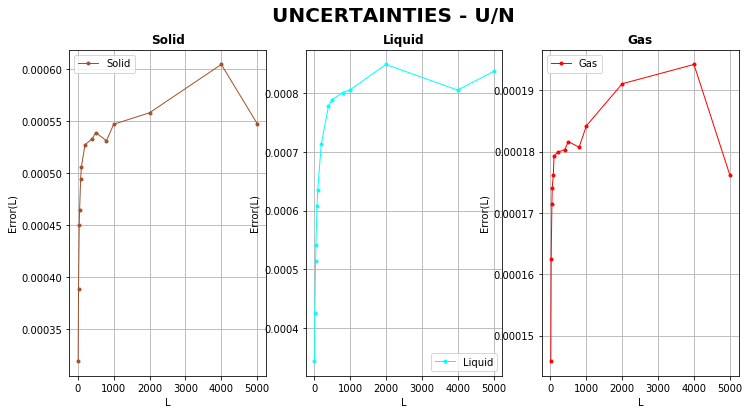

In [4]:
import math
def error(AV,AV2,N):
    return math.sqrt((AV2/N - (AV/N)**2)/(N-1))

v,w=np.loadtxt("ex_7/instval_equilibrated.solid.out", usecols=(0, 1), unpack=True, max_rows=500000)
L=[10, 20, 40, 50, 80, 100, 200, 400, 500, 800, 1000, 2000, 4000, 5000]
M=500000
err = []
s1, sumprog, su2prog = 0.0, 0.0, 0.0


for i in range (0, len(L)):
    N=M/L[i]
    for j in range (0,int(N)):
        for k in range(0, L[i]): 
            s1 += v[k+L[i]*j]
        sumprog += s1/L[i]
        su2prog += (s1/L[i])**2
        s1 = 0.0
    err.append(error(sumprog, su2prog, N))
    sumprog, su2prog = 0.0, 0.0
            

fig=plt.figure(figsize=(12,6))
fig.suptitle('UNCERTAINTIES - U/N', fontsize=20, fontweight="bold")

plt.subplot(131)
plt.title("Solid", fontweight="bold")
plt.plot(L, err, color= "sienna", linewidth=1, label='Solid', marker=".")
plt.xlabel("L")
plt.ylabel("Error(L)")
plt.legend()
plt.grid(True)

v,w=np.loadtxt("ex_7/instval_equilibrated.liquid.out", usecols=(0, 1), unpack=True, max_rows=500000)
err = []
s1, sumprog, su2prog = 0.0, 0.0, 0.0
for i in range (0, len(L)):
    N=M/L[i]
    for j in range (0,int(N)):
        for k in range(0, L[i]): 
            s1 += v[k+L[i]*j]
        sumprog += s1/L[i]
        su2prog += (s1/L[i])**2
        s1 = 0.0
    err.append(error(sumprog, su2prog, N))
    sumprog, su2prog = 0.0, 0.0

plt.subplot(132)
plt.title("Liquid", fontweight="bold")
plt.plot(L, err, color= "cyan", linewidth=1, label='Liquid', marker=".")
plt.xlabel("L")
plt.ylabel("Error(L)")
plt.legend()
plt.grid(True)

v,w=np.loadtxt("ex_7/instval_equilibrated.gas.out", usecols=(0, 1), unpack=True, max_rows=500000)
err = []
s1, sumprog, su2prog = 0.0, 0.0, 0.0
for i in range (0, len(L)):
    N=M/L[i]
    for j in range (0,int(N)):
        for k in range(0, L[i]): 
            s1 += v[k+L[i]*j]
        sumprog += s1/L[i]
        su2prog += (s1/L[i])**2
        s1 = 0.0
    err.append(error(sumprog, su2prog, N))
    sumprog, su2prog = 0.0, 0.0
            
plt.subplot(133)
plt.title("Gas", fontweight="bold")
plt.plot(L, err, color= "red", linewidth=1, label='Gas', marker=".")
plt.xlabel("L")
plt.ylabel("Error(L)")
plt.legend()
plt.grid(True)

v,w=np.loadtxt("ex_7/instval_equilibrated.solid.out", usecols=(0, 1), unpack=True, max_rows=500000)
err = []
s1, sumprog, su2prog = 0.0, 0.0, 0.0
for i in range (0, len(L)):
    N=M/L[i]
    for j in range (0,int(N)):
        for k in range(0, L[i]): 
            s1 += w[k+L[i]*j]
        sumprog += s1/L[i]
        su2prog += (s1/L[i])**2
        s1 = 0.0
    err.append(error(sumprog, su2prog, N))
    sumprog, su2prog = 0.0, 0.0
            



### 7.03

### Distribuzione Radiale

Con la dimensione corretta dei blocchi, si è proceduto al calcolo della funzione di distribuzione radiale $g(r)$, con $r \in \left[ 0; L/2\right]$. Questa corrisponde al rapporto fra la probabilità di trovare due particelle ad una certa distanza $r$ rispetto alla distribuzione randomica di un gas perfetto nelle stesse condizioni termodinamiche. Perciò, come si può notare dal grafico, il potenziale di core azzera la distribuzione radiale per valori inferiori alla dimensione atomica (circa $\sigma$), perchè diversamente da una gas perfetto, non è possibile la sovrapposizione di particelle. 

Per il calcolo è stato riempito per ogni coppia di particelle il bin corrispondente ad una certa distanza $r$ di un istogramma e in seguito è stato normalizzato dividendo per la quantità $\rho N\Delta V(r)$.

Nella simulazione NVT la stima di $g(r)$ è stata ottenuta dalla media dei valori ottenuti in ogni canale e l'incertezza è stata calcolata con un numero di blocchi $N=40$ di $L=500$ passi ciascuno, per un totale di $M=20000$ passi. I valori di temperatura utilizzati sono i valori medi della simulazione NVE corrispondente, elencati nelle prime righe del riquadro dell'es.7.04

Nella simulazione NVE invece, è stata effettuata una misura ogni 10 passi, per 1000 passi in ciascuno dei $N=40$ blocchi, quindi $L=100$ valori in ogni blocco.
I valori sono stati poi messi a confronto sommando in quadratura l'errore e il risultato è stato commentato alla fine dell'ultima sezione.


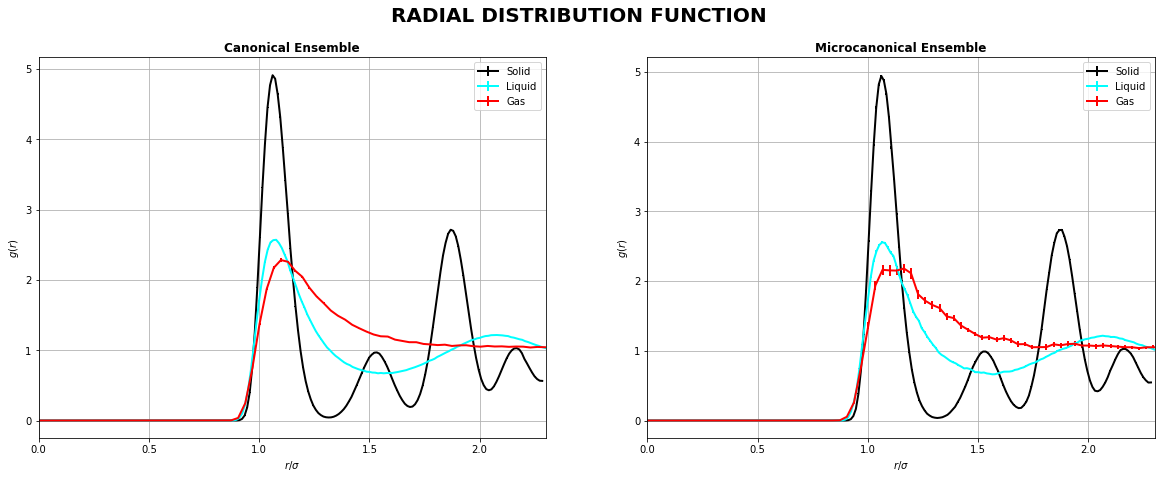

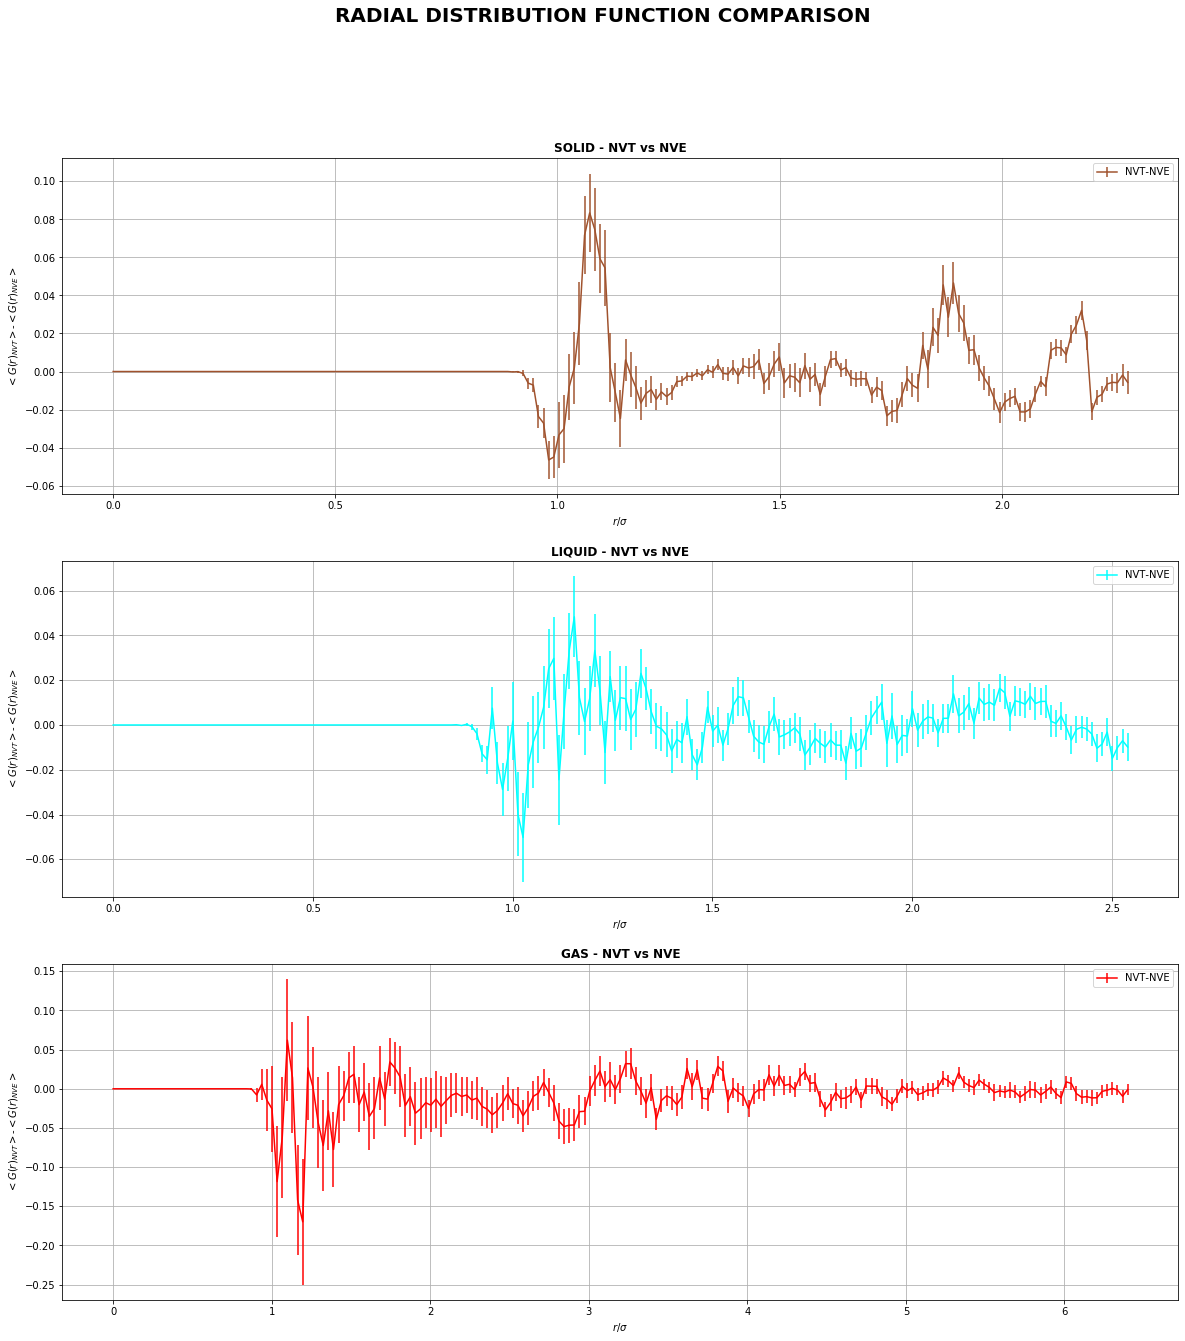

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math 


fig=plt.figure(figsize=(20,7))
fig.suptitle('RADIAL DISTRIBUTION FUNCTION', fontsize=20, fontweight="bold")

plt.subplot(121)
plt.title("Canonical Ensemble", fontweight="bold")

x,y,err=np.loadtxt("ex_7/output.gave.solid.0", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x, y, yerr=err, color= "black", linewidth=2, label='Solid')

x,y,err=np.loadtxt("ex_7/output.gave.liquid.0", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x, y, yerr=err, color= "cyan", linewidth=2, label='Liquid')

x,y,err=np.loadtxt("ex_7/output.gave.gas.0", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x, y, yerr=err, color= "red", linewidth=2, label='Gas')
plt.grid(True)
plt.xlabel('$r/\sigma$')
plt.ylabel('$g(r)$')
plt.legend()
plt.xlim(0.0, 2.3)

plt.subplot(122)
plt.title("Microcanonical Ensemble", fontweight="bold")

x,y,err=np.loadtxt("ex_7/MD/solid_out/ave_gave.out", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x, y, yerr=err, color= "black", linewidth=2, label='Solid')

x,y,err=np.loadtxt("ex_7/MD/liquid_out/ave_gave.out", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x, y, yerr=err, color= "cyan", linewidth=2, label='Liquid')

x,y,err=np.loadtxt("ex_7/MD/gas_out/ave_gave.out", usecols=(0, 1, 2), unpack=True)
plt.errorbar(x, y, yerr=err, color= "red", linewidth=2, label='Gas')
plt.grid(True)
plt.xlabel('$r/\sigma$')
plt.ylabel('$g(r)$')
plt.legend()
plt.xlim(0.0, 2.3)
plt.show()


fig=plt.figure(figsize=(20,21))
fig.suptitle('RADIAL DISTRIBUTION FUNCTION COMPARISON', fontsize=20, fontweight="bold")

plt.subplot(311)
x,y,err =np.loadtxt("ex_7/VS/output.gave.solid.0", usecols=(0, 1, 2), unpack=True)
z,k,errz =np.loadtxt("ex_7/MD/solid_out/ave_gave.out", usecols=(0, 1, 2), unpack=True)

for i in range(err.size):
    err[i]=math.sqrt(err[i]*err[i]+errz[i]*errz[i])
    
plt.title("SOLID - NVT vs NVE", fontweight="bold")
plt.errorbar(x, y-k, yerr=err, color= "sienna", label='NVT-NVE')
plt.legend()
plt.xlabel('$r/\sigma$')
plt.ylabel('$<G(r)_{NVT}>$-$<G(r)_{NVE}>$')
plt.grid(True)

plt.subplot(312)
x,y,err =np.loadtxt("ex_7/VS/output.gave.liquid.0", usecols=(0, 1, 2), unpack=True)
z,k,errz =np.loadtxt("ex_7/MD/liquid_out/ave_gave.out", usecols=(0, 1, 2), unpack=True)

for i in range(errz.size):
    err[i]=math.sqrt(err[i]*err[i]+errz[i]*errz[i])
    
plt.title("LIQUID - NVT vs NVE", fontweight="bold")
plt.errorbar(x, y-k, yerr=err, color= "cyan", label='NVT-NVE')
plt.legend()
plt.xlabel('$r/\sigma$')
plt.ylabel('$<G(r)_{NVT}>$-$<G(r)_{NVE}>$')
plt.grid(True)

plt.subplot(313)
x,y,err =np.loadtxt("ex_7/VS/output.gave.gas.0", usecols=(0, 1, 2), unpack=True)
z,k,errz =np.loadtxt("ex_7/MD/gas_out/ave_gave.out", usecols=(0, 1, 2), unpack=True)

for i in range(err.size):
    err[i]=math.sqrt(err[i]*err[i]+errz[i]*errz[i])
    
plt.title("GAS - NVT vs NVE", fontweight="bold")
plt.errorbar(x, y-k, yerr=err, color= "red", label='NVT-NVE')
plt.legend()
plt.xlabel('$r/\sigma$')
plt.ylabel('$<G(r)_{NVT}>$-$<G(r)_{NVE}>$')
plt.grid(True)

### 7.04

Infine sono stati calcolati i valori corrispondenti a $U/N$ e $P$ per il sistema nel caso NVT per tutte e tre le fasi e confrontati con i valori ottenuti nel caso NVE. 
Per permettere un confronto, sono state utilizzate le temperature medie delle simulazioni NVE come valori di input per NVT (risultati salvati nella cartella VS). Inoltre sono stati graficati i valori relativi alla temperatura media e a quella istantanea del sistema NVE. Infine, in entrambe le stime, sono state aggiunte le tail correction nel computo di $U/N$ e $P$, ovvero le correzioni che includono nel calcolo il contributo delle interazioni a lungo raggio, mancanti a causa del cut-off sferico.  

Le modalità di computo dei valori e dell'incertezza sono le medesime del punto precedente. 

== SOLID PHASE ==
== LJ units ==
Temperature :  0.76944
Number of particles :  108.0
Density :  1.1
Potential cut off :  2.2
Time step :  0.12
Potential Energy NVT:  -1.25746e-20  +-  3.22868e-24 [J]
Pressure NVT:  3.08574e-19  +-  4.54363e-22 [Pa]
Temperature:  92.3636  +-  0.0714302 [K]
== LIQUID PHASE ==
== LJ units ==
Temperature :  1.1423
Number of particles :  108.0
Density :  0.8
Potential cut off :  2.5
Time step :  0.2
Potential Energy NVT:  -9.00399e-21  +-  6.30618e-24 [J]
Pressure NVT:  6.56337e-20  +-  8.62114e-22 [Pa]
Temperature:  137.08  +-  0.377073 [K]
== GAS PHASE ==
== LJ units ==
Temperature :  1.2577
Number of particles :  108.0
Density :  0.05
Potential cut off :  5.0
Time step :  5.0
Potential Energy NVT:  -6.68627e-22  +-  1.18534e-24 [J]
Pressure NVT:  2.2081e-21  +-  4.26433e-24 [Pa]
Temperature:  150.932  +-  0.654512 [K]


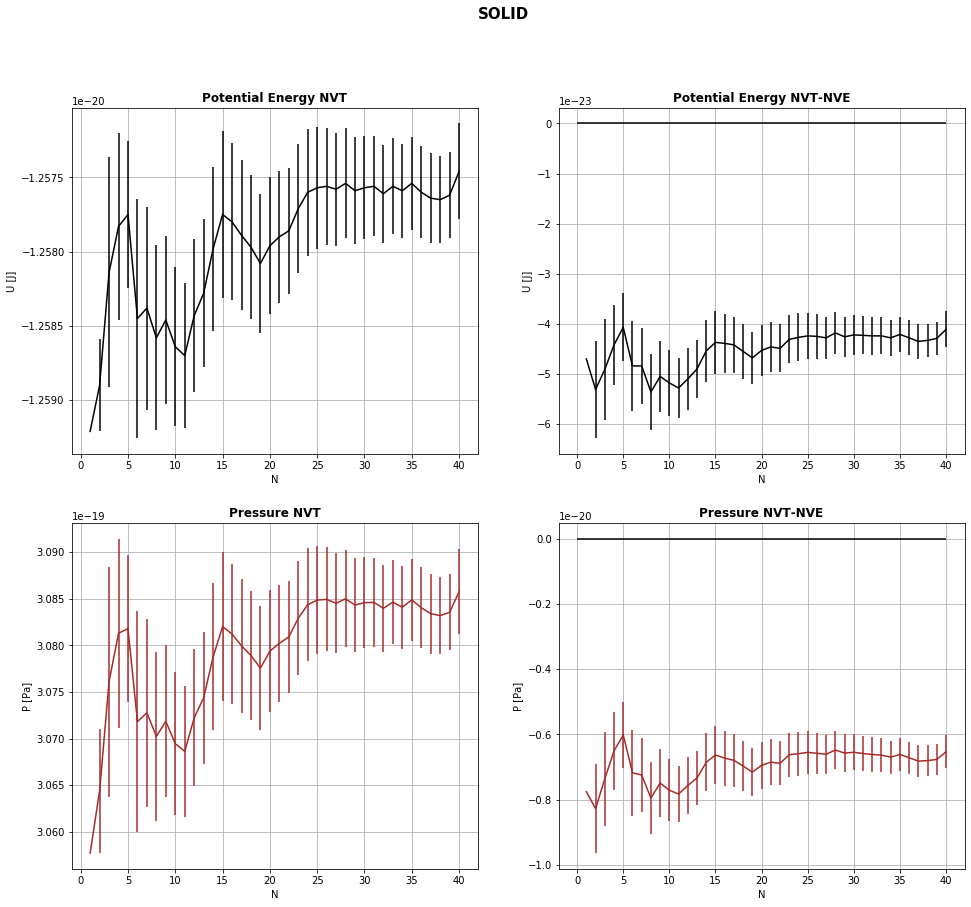

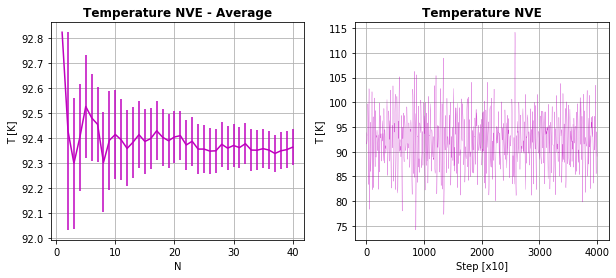

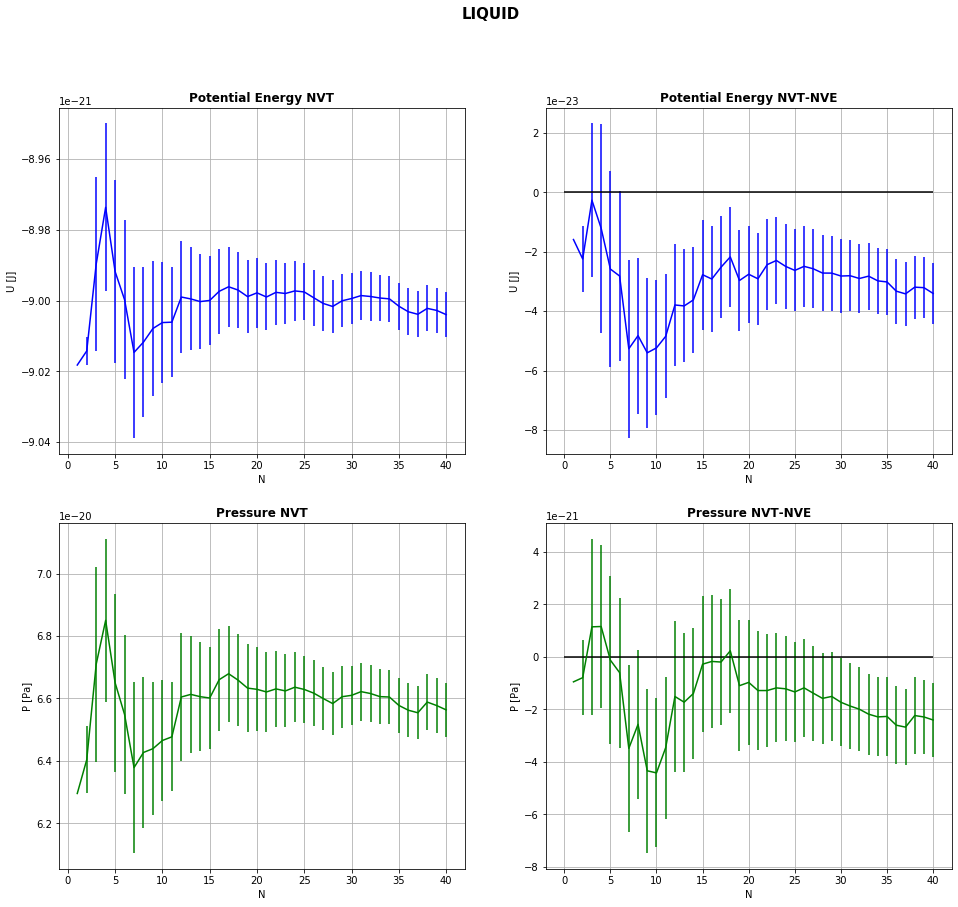

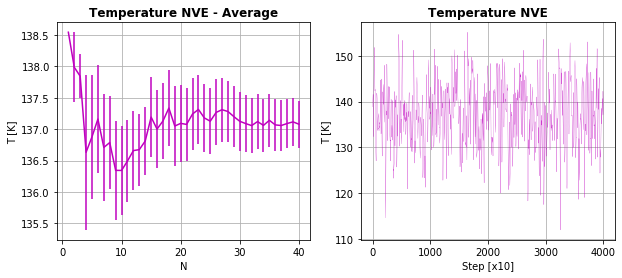

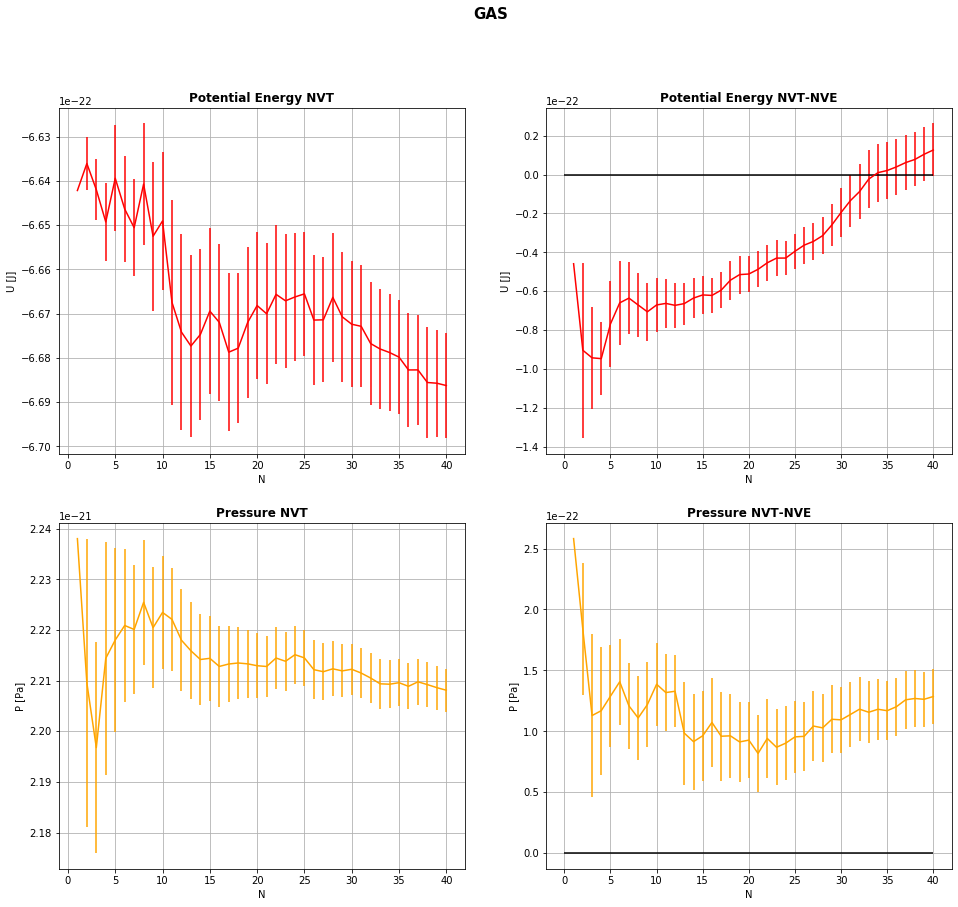

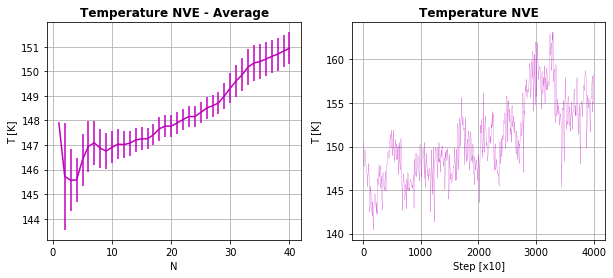

In [5]:

#SOLID PHASE 
#############################################################
#print initial conditions
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(16,14))
fig.suptitle('SOLID', fontsize=15, fontweight="bold")

init=np.loadtxt("ex_7/VS/input.solid", usecols=(0), unpack=True, max_rows=5)
print ("=================")
print ("=================")
print ("== SOLID PHASE ==")
print ("== LJ units ==")
print ("Temperature : ", init[0])
print ("Number of particles : ", init[1])
print ("Density : ", init[2])
print ("Potential cut off : ", init[3])
print ("Time step : ", init[4])
print ("=================")
print ("=================")




plt.subplot(221)
y,err=np.loadtxt("ex_7/VS/output.epot.solid.0", usecols=(2, 3), unpack=True)
x= range(1, y.size+1, 1)
print ("Potential Energy NVT: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="black")
plt.title("Potential Energy NVT", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [J]")
plt.grid(True)

plt.subplot(222)
z,errz=np.loadtxt("ex_7/MD/solid_out/ave_epot.out", usecols=(2, 3), unpack=True)
for i in range(err.size):
    err[i]=math.sqrt(err[i]*err[i]+errz[i]*errz[i])
plt.errorbar(x,y-z,yerr=err, color="black")
plt.title("Potential Energy NVT-NVE", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [J]")
plt.hlines(0.0, y.size, 0.0)
plt.grid(True)

plt.subplot(223)
y,err=np.loadtxt("ex_7/VS/output.pres.solid.0", usecols=(2, 3), unpack=True)
x= range(1, y.size+1, 1)
print ("Pressure NVT: ", y[y.size-1], " +- ", err[y.size-1], "[Pa]")
plt.errorbar(x,y,yerr=err, color="brown")
plt.title("Pressure NVT", fontweight="bold")
plt.xlabel("N")
plt.ylabel("P [Pa]")
plt.grid(True)

plt.subplot(224)
z,errz=np.loadtxt("ex_7/MD/solid_out/ave_press.out", usecols=(2, 3), unpack=True)
for i in range(err.size):
    err[i]=math.sqrt(err[i]*err[i]+errz[i]*errz[i])
plt.errorbar(x,y-z,yerr=err, color="brown")
plt.title("Pressure NVT-NVE", fontweight="bold")
plt.xlabel("N")
plt.ylabel("P [Pa]")
plt.hlines(0.0, y.size, 0.0)
plt.grid(True)


fig=plt.figure(figsize=(10, 4))
plt.subplot(121)

y,err=np.loadtxt("ex_7/MD/solid_out/ave_temp.out", usecols=(2, 3), unpack=True)
x= range(1, y.size+1, 1)

print ("Temperature: ", y[y.size-1], " +- ", err[y.size-1], "[K]")

plt.errorbar(x,y,yerr=err, color="m")
plt.title("Temperature NVE - Average", fontweight="bold")
plt.xlabel("N")
plt.ylabel("T [K]")
plt.grid(True)


plt.subplot(122)
y=np.loadtxt("ex_7/MD/solid_out/temp_insta.out", unpack=True)
x= range(1, y.size+1, 1)
plt.plot(x,y*120, color="m", linewidth=0.2)
plt.title("Temperature NVE", fontweight="bold")
plt.xlabel("Step [x10]")
plt.ylabel("T [K]")
plt.grid(True)

#LIQUID PHASE 
#############################################################
#print initial conditions
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(16,14))
fig.suptitle('LIQUID', fontsize=15, fontweight="bold")

init=np.loadtxt("ex_7/VS/input.liquid", usecols=(0), unpack=True, max_rows=5)
print ("=================")
print ("=================")
print ("== LIQUID PHASE ==")
print ("== LJ units ==")
print ("Temperature : ", init[0])
print ("Number of particles : ", init[1])
print ("Density : ", init[2])
print ("Potential cut off : ", init[3])
print ("Time step : ", init[4])
print ("=================")
print ("=================")





plt.subplot(221)
y,err=np.loadtxt("ex_7/VS/output.epot.liquid.0", usecols=(2, 3), unpack=True)
x= range(1, y.size+1, 1)
print ("Potential Energy NVT: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="blue")
plt.title("Potential Energy NVT", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [J]")
plt.grid(True)

plt.subplot(222)
z,errz=np.loadtxt("ex_7/MD/liquid_out/ave_epot.out", usecols=(2, 3), unpack=True)
for i in range(err.size):
    err[i]=math.sqrt(err[i]*err[i]+errz[i]*errz[i])
plt.errorbar(x,y-z,yerr=err, color="blue")
plt.title("Potential Energy NVT-NVE", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [J]")
plt.hlines(0.0, y.size, 0.0)
plt.grid(True)

plt.subplot(223)
y,err=np.loadtxt("ex_7/VS/output.pres.liquid.0", usecols=(2, 3), unpack=True)
x= range(1, y.size+1, 1)
print ("Pressure NVT: ", y[y.size-1], " +- ", err[y.size-1], "[Pa]")
plt.errorbar(x,y,yerr=err, color="green")
plt.title("Pressure NVT", fontweight="bold")
plt.xlabel("N")
plt.ylabel("P [Pa]")
plt.grid(True)

plt.subplot(224)
z,errz=np.loadtxt("ex_7/MD/liquid_out/ave_press.out", usecols=(2, 3), unpack=True)
for i in range(err.size):
    err[i]=math.sqrt(err[i]*err[i]+errz[i]*errz[i])
plt.errorbar(x,y-z,yerr=err, color="green")
plt.title("Pressure NVT-NVE", fontweight="bold")
plt.xlabel("N")
plt.ylabel("P [Pa]")
plt.hlines(0.0, y.size, 0.0)
plt.grid(True)


fig=plt.figure(figsize=(10, 4))
plt.subplot(121)

y,err=np.loadtxt("ex_7/MD/liquid_out/ave_temp.out", usecols=(2, 3), unpack=True)
x= range(1, y.size+1, 1)

print ("Temperature: ", y[y.size-1], " +- ", err[y.size-1], "[K]")

plt.errorbar(x,y,yerr=err, color="m")
plt.title("Temperature NVE - Average", fontweight="bold")
plt.xlabel("N")
plt.ylabel("T [K]")
plt.grid(True)


plt.subplot(122)
y=np.loadtxt("ex_7/MD/liquid_out/temp_insta.out", unpack=True)
x= range(1, y.size+1, 1)
plt.plot(x,y*120, color="m", linewidth=0.2)
plt.title("Temperature NVE", fontweight="bold")
plt.xlabel("Step [x10]")
plt.ylabel("T [K]")
plt.grid(True)



#GAS PHASE 
#############################################################
#print initial conditions

fig=plt.figure(figsize=(16,14))
fig.suptitle('GAS', fontsize=15, fontweight="bold")

init=np.loadtxt("ex_7/VS/input.gas", usecols=(0), unpack=True, max_rows=5)
print ("=================")
print ("=================")
print ("== GAS PHASE ==")
print ("== LJ units ==")
print ("Temperature : ", init[0])
print ("Number of particles : ", init[1])
print ("Density : ", init[2])
print ("Potential cut off : ", init[3])
print ("Time step : ", init[4])
print ("=================")
print ("=================")




plt.subplot(221)
y,err=np.loadtxt("ex_7/VS/output.epot.gas.0", usecols=(2, 3), unpack=True)
x= range(1, y.size+1, 1)
print ("Potential Energy NVT: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="red")
plt.title("Potential Energy NVT", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [J]")
plt.grid(True)

plt.subplot(222)
z,errz=np.loadtxt("ex_7/MD/gas_out/ave_epot.out", usecols=(2, 3), unpack=True)
for i in range(err.size):
    err[i]=math.sqrt(err[i]*err[i]+errz[i]*errz[i])
plt.errorbar(x,y-z,yerr=err, color="red")
plt.title("Potential Energy NVT-NVE", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [J]")
plt.hlines(0.0, y.size, 0.0)
plt.grid(True)

plt.subplot(223)
y,err=np.loadtxt("ex_7/VS/output.pres.gas.0", usecols=(2, 3), unpack=True)
x= range(1, y.size+1, 1)
print ("Pressure NVT: ", y[y.size-1], " +- ", err[y.size-1], "[Pa]")
plt.errorbar(x,y,yerr=err, color="orange")
plt.title("Pressure NVT", fontweight="bold")
plt.xlabel("N")
plt.ylabel("P [Pa]")
plt.grid(True)

plt.subplot(224)
z,errz=np.loadtxt("ex_7/MD/gas_out/ave_press.out", usecols=(2, 3), unpack=True)
for i in range(err.size):
    err[i]=math.sqrt(err[i]*err[i]+errz[i]*errz[i])
plt.errorbar(x,y-z,yerr=err, color="orange")
plt.title("Pressure NVT-NVE", fontweight="bold")
plt.xlabel("N")
plt.ylabel("P [Pa]")
plt.hlines(0.0, y.size, 0.0)
plt.grid(True)


fig=plt.figure(figsize=(10, 4))
plt.subplot(121)

y,err=np.loadtxt("ex_7/MD/gas_out/ave_temp.out", usecols=(2, 3), unpack=True)
x= range(1, y.size+1, 1)

print ("Temperature: ", y[y.size-1], " +- ", err[y.size-1], "[K]")

plt.errorbar(x,y,yerr=err, color="m")
plt.title("Temperature NVE - Average", fontweight="bold")
plt.xlabel("N")
plt.ylabel("T [K]")
plt.grid(True)


plt.subplot(122)
y=np.loadtxt("ex_7/MD/gas_out/temp_insta.out", unpack=True)
x= range(1, y.size+1, 1)
plt.plot(x,y*120, color="m", linewidth=0.2)
plt.title("Temperature NVE", fontweight="bold")
plt.xlabel("Step [x10]")
plt.ylabel("T [K]")
plt.grid(True)


### Commento conclusivo:
Dopo aver graficato i risultati ottenuti con NVE e NVT sia per le grandezze termodinamiche che per la funzione di distribuzione radiale si nota che da un confronto diretto delle quantità ottenute con le due simulazioni i valori non risultano compatibili. Questo può essere causato dal fatto che nel primo caso l'evoluzione del sistema è stata ottenuta ad energia fissata secondo l'algoritmo di Verlet e quindi integrando le equazioni del moto, mentre per NVT l'evoluzione del sistema è statistica, campionando i pesi di boltzmann con l'algoritmo di metropolis a temperatura fissata. Inoltre nel primo caso il sistema in esame è un sistema isolato mentre nel secondo caso il sistema è chiuso e a contatto con un bagno termico. Sono stati inoltre riportati i grafici della temperatura istantanea e della temperatura media con incertezza calcolata con il metodo a blocchi nella simulazione NVE, per avere un'idea della grandezza delle variazioni di quest'ultima nel corso della simulazione. 